<a href="https://colab.research.google.com/github/swetha2348568/ML_assignments/blob/main/PCA_classwork_2348568.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/drive/MyDrive/Wine.csv')
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


<Axes: xlabel='1', ylabel='count'>

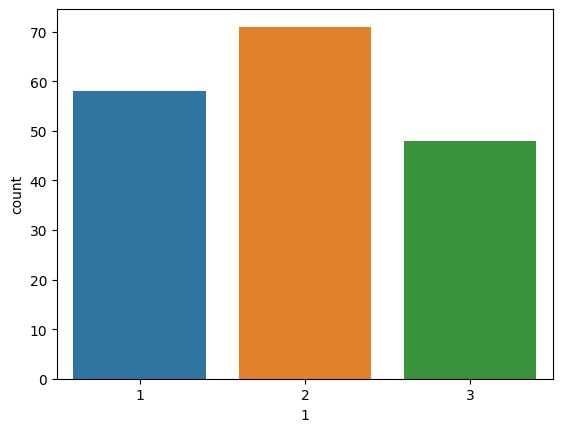

In [4]:
sns.countplot(x = '1',data=df)

In [5]:
target = df['1']
df = df.drop('1',axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size =0.20,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
tr_comp = pca.fit_transform(X_train)
ts_comp = pca.transform(X_test)

Text(0, 0.5, 'PC2')

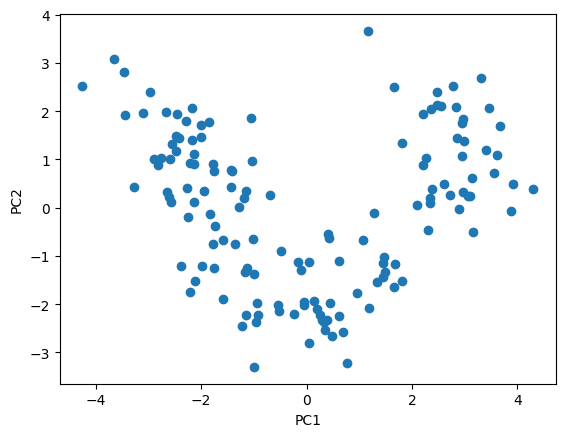

In [10]:
plt.scatter(x=tr_comp[:,0],y=tr_comp[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(tr_comp, y_train)

DecisionTreeRegressor(random_state=42)

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
y_pred_regressor = dt_regressor.predict(ts_comp)

# Evaluate the Decision Tree Regressor
mse_regressor = mean_squared_error(y_test, y_pred_regressor)
print(f'Mean Squared Error of Decision Tree Regressor: {mse_regressor}')

Mean Squared Error of Decision Tree Regressor: 0.05555555555555555


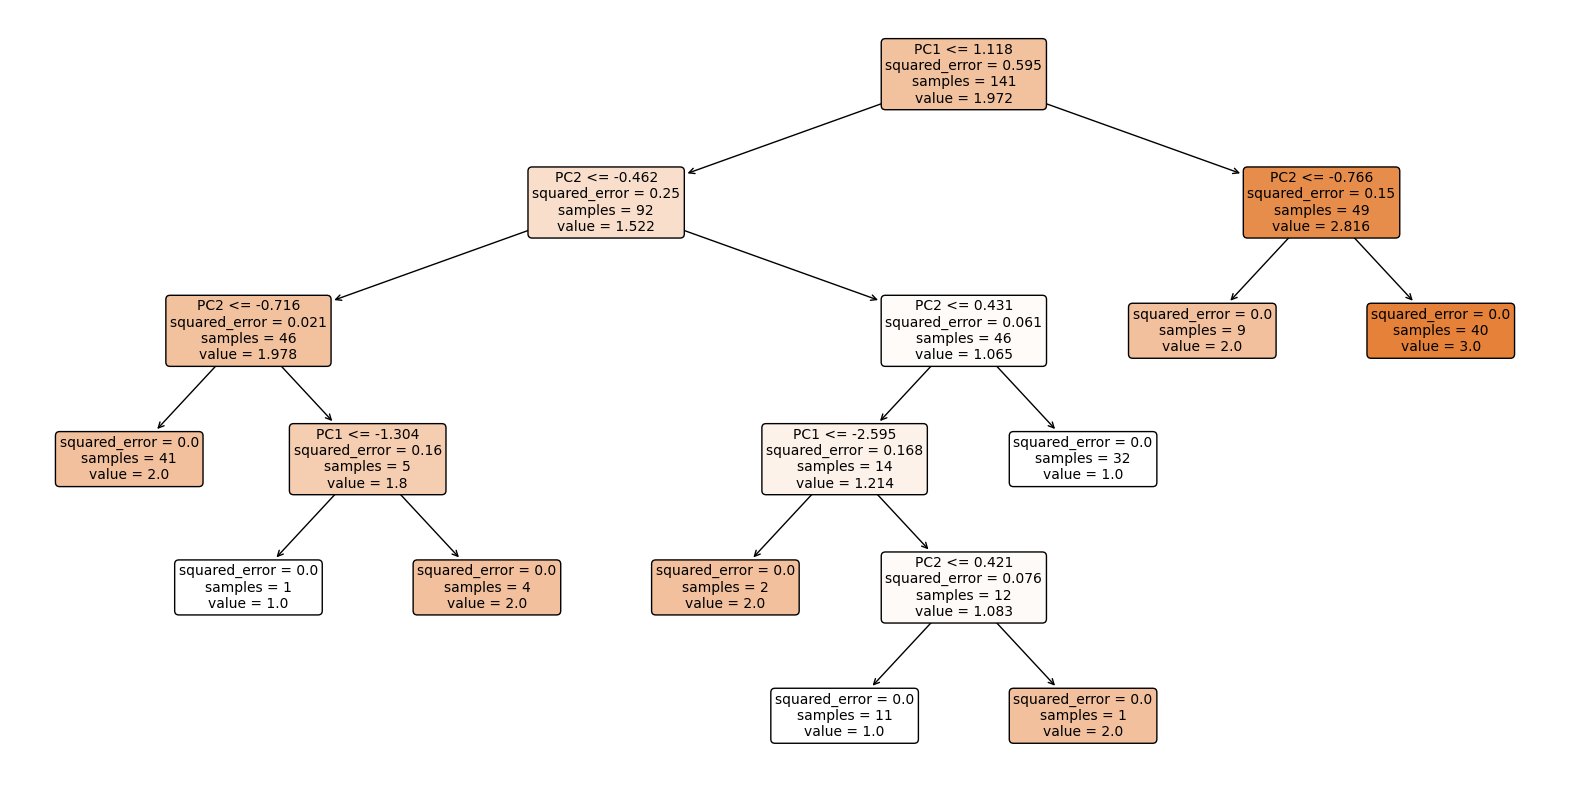

In [17]:
from sklearn.tree import plot_tree

# Visualize the Decision Tree Regressor
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=['PC1', 'PC2'], rounded=True, fontsize=10)
plt.show()
